> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project 1: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

## Overview and Notes

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
* Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
* There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
* The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.


**Q1.** What are the top 5 movie releases? \
**Q2.** How many movies where released each year? \
**Q3.** How far apart from the first release was the last release date? \
**Q4.** How successful are movies released in the summer vs the winter? \
**Q5.** How does movie budget correlate to success? \
**Q6:** How does the runtime affect the ratings?

**Dependent Variables:**
Variables that can change because it could change depending on several factors \
**Independent Variables:**
Variables that cannot change because it does not depend on other factors

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
%matplotlib inline
import seaborn as sns
from collections import Counter
from datetime import datetime
import random

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Inspecting the dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


There are **5696** zero values for the budget column which span **52%** of the entries so dropping that much data may skew the results. Setting these numbers to null should allow the values to be ignored instead which is safer.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Clearing the uneccessary data from the Dataset)

**Here is a list of the things we need to do clean the data:**

1. Drop unused columns such as 'imdb_id' and 'homepage'
2. Remove duplicate rows of data from the Dataset
3. Find 'Null' values
4. Drop the movies that have zero value budget or revenue
5. Change the format of the release date to datetime format

### 1. Drop unused columns such as 'imdb_id' and 'homepage'

Out of the 21 columns in this dataset, there are a few that are not required to answer our questions. We can drop these columns now: 'imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'.

In [3]:
# After using df.info, we noticed many columns with unimportant data. We can drop them using 'drop()'' function
print("Before Removing Columns (Rows, Columns):", df.shape)

df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], axis =1, inplace = True)
print("After Removing Columns (Rows, Columns):", df.shape)

Before Removing Columns (Rows, Columns): (10866, 21)
After Removing Columns (Rows, Columns): (10866, 15)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


### 2. Remove duplicate rows of data from the Dataset

We now have to search for the duplicated rows of data entries using duplicated().

In [5]:
#'To find the duplicate rows we can use the duplicated()' function to return the duplicate row as True or False 
# However, we can also add sum() to count the duplicate entries by summing all the rows
sum(df.duplicated())

1

In [6]:
# Printing 'Before Removing Duplicate Values'
print('Before Removing Duplicates (Rows, Columns):', df.shape)

Before Removing Duplicates (Rows, Columns): (10866, 15)


In [7]:
# We can use the 'drop_duplicates()' function to remove the 1 duplicate row we found
df.drop_duplicates(inplace = True)

In [8]:
# Printing 'After Removing Duplicate Values'
print('After Removing Duplicates (Rows, Columns):', df.shape)

After Removing Duplicates (Rows, Columns): (10865, 15)


### 3. Finding Null Values

We can check for null values using info() then drop or estimate them depending on the importance of the values.

In [9]:
# Looking at null values and datatypes for each column so we won't need to use df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.3+ MB


**Finding 1:** Looking at df.info() it seems there are 10866 entries spanned across 21 columns. Some columns have missing data so we'll have to sort them out.

In [10]:
# Finding the columns with null values
df.columns[df.isna().any()].tolist()

['cast', 'director', 'keywords', 'genres', 'production_companies']

In [11]:
list(df.isnull().sum().items())

[('id', 0),
 ('popularity', 0),
 ('budget', 0),
 ('revenue', 0),
 ('original_title', 0),
 ('cast', 76),
 ('director', 44),
 ('keywords', 1493),
 ('runtime', 0),
 ('genres', 23),
 ('production_companies', 1030),
 ('release_date', 0),
 ('vote_count', 0),
 ('vote_average', 0),
 ('release_year', 0)]

**Finding 2:** Looking at the list of null items it seems "homepage", "tagline", "keywords" and "production_companies" have too many null values so I'll drop those columns.

In [12]:
# We can fill the null values with zero using the function called 'fillna'
df.fillna(0)
print()

In [13]:
# We can use this function to see the null values still remaining
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [14]:
# We can see the 'cast', 'director', and 'genres' have a low amount of null values which can be safely removed
# I added 'subset =' to the code to mute the error about supplying multiple axis to axis being depreciated in future
df.dropna(subset = ['cast', 'director', 'genres'], inplace=True)

In [15]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [16]:
# Trying to find outliers using describe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283,12.820151
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


**Finding 3:** The popularity column has some outliers from looking at the "max" and "min" numbers. Also, there are a few 0 values in the "min" numbers for "budget", "revenue", "runtime", "budget_adj" and "revenue_adj".

### 4. Drop movies that have zero value budget or revenue 

We can decide what to do with the 0 values now that we have dealt with the null values. Our actions will depend on the amount of data affected.

In [17]:
# Checking for absense of data by looking at how many films have a 0 budget or revenue value
nobudget = df.query('budget == "0"').count()['id']
norevenue = df.query('revenue == "0"').count()['id']

print('Rows with 0 value "budget":', nobudget)
print('Rows with 0 value "revenue":', norevenue)

Rows with 0 value "budget": 5578
Rows with 0 value "revenue": 5888


In [18]:
# Working the total percentage of the data with a zero value
budgetcount = df['budget'].count()
revenuecount = df['revenue'].count()

a_number = nobudget/budgetcount
b_number = nobudget/revenuecount

a_percentage = "{:.0%}".format(a_number)
b_percentage = "{:.0%}".format(b_number)

print('Rows with 0 value "budget" as % :', a_percentage)
print('Rows with 0 value "revenue" as % :', b_percentage)

Rows with 0 value "budget" as % : 52%
Rows with 0 value "revenue" as % : 52%


In [19]:
# Replacing zero values with null values in their respective columns
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


### 5. Change the format of the release date to datetime format

The release date column seems to use the month/day/year in string format. We need this data in datetime format to make the data easier to work with as dates. We will also change the order to year/month/day to make it easier to understand.

In [20]:
df.release_date.tail()

10861     6/15/66
10862    12/21/66
10863      1/1/66
10864     11/2/66
10865    11/15/66
Name: release_date, dtype: object

In [21]:
# Using this function and library will correct the dates such as 2066 to 1966. It will also format them to datetime64.
from datetime import timedelta, date
col = 'release_date'
df[col] = pd.to_datetime(df[col])
future = df[col] > pd.Timestamp(date(year=2050,month=1,day=1)) #check here
df.loc[future, col] -= timedelta(days=365.25*100)

In [22]:
# Checking the dates are now in the correct format at the bottom: datetime64[ns]
df.release_date.tail()

10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, dtype: datetime64[ns]

In [23]:
# Checking the cleaned data
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What are the Top 5 highest revenue movies?)

In [24]:
# Formatting ticks for large values (this will change the large numbers in charts to short clean values)
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

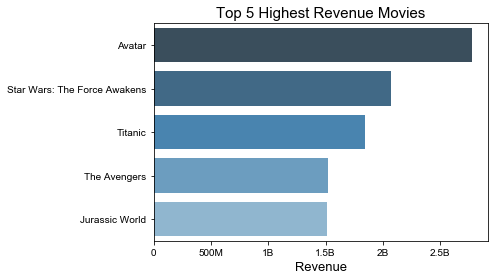

In [25]:
# Sorting the revenue column in decending order to get the 5 highest revenue movies
top_5 = pd.DataFrame(df['revenue'].sort_values(ascending = False))

# Defining movie titles and revenue
top_5['original_title'] = df['original_title'] # Movie titles
top_5_rev = list(map(str,(top_5['original_title']))) # Revenue data

# Extracting revenue and name data from the dataframe for the Top 10 movies
x = list(top_5_rev[:5]) # Defing x axis
y = list(top_5['revenue'][:5]) # Defining y axis

# Creating the Bar Chart
ax = sns.barplot(x=y,y=x, palette="Blues_d")
sns.set(rc={'figure.figsize':(12,5)})

# Labels
ax.set_title("Top 5 Highest Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)


# Ticks
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# Setting the stylesheet
sns.set_style("white")

In [26]:
print(top_5.head(5))

           revenue                original_title
1386  2.781506e+09                        Avatar
3     2.068178e+09  Star Wars: The Force Awakens
5231  1.845034e+09                       Titanic
4361  1.519558e+09                  The Avengers
0     1.513529e+09                Jurassic World


**Answer:** Acording to our data, the top 5 highest revenue movies are 1. Avatar (\\$2.8B) followed by 2. Star Wars: The Force Awakens (\\$2B), 3. Titanic (\\$1.8B), 4. The Avengers (\\$1.8B), and 5. Jurassic World (\\$1.5B).

### Research Question 2  (How many movies are released per year?)

In [27]:
# To find the releases each year I am grouping the counts for the number of movie releases each year 
release_year_data = df.groupby('release_year').count()['id']

# Printing the tail for the dataset we just created
print(release_year_data.head())

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64


In [28]:
# Finding the statistical data for the release_year dataset
release_year_data.describe()

count     56.00000
mean     191.62500
std      184.26824
min       30.00000
25%       46.75000
50%      128.00000
75%      246.75000
max      682.00000
Name: id, dtype: float64

In [29]:
# To find the releases each year I am grouping the counts for the number of movie releases each year using nunique now
release_year_data_1 = df.groupby('release_year')['id'].nunique().reset_index(name='movie_releases')

# Setting the index as id (movie release count) so I can use it to find the year
release_year_data_1 = release_year_data_1.set_index('release_year')

# Checking the index
release_year_data_1.tail()

,movie_releases
release_year,
2011,532
2012,574
2013,649
2014,682
2015,617


In [30]:
# To find the releases each year I am grouping the counts for the number of movie releases each year using nunique now
release_year_data_2 = df.groupby('release_year')['id'].nunique().reset_index(name='movie_releases')

# Setting the index as id (movie release count) so I can use it to find the year
release_year_data_2 = release_year_data_2.set_index('movie_releases')

# Checking the index
release_year_data_2.tail()

,release_year
movie_releases,
532,2011
574,2012
649,2013
682,2014
617,2015


In [31]:
# Release_year sum finder
release_year_data_1.filter(like='1969', axis=0)

,movie_releases
release_year,
1969,30


In [32]:
# Movie_release number sum finder
release_year_data_2.filter(like='682', axis=0)

,release_year
movie_releases,
682,2014


In [33]:
# Percentage increase of movie releases from 1960 - 2015
pct_change = release_year_data_1.loc[[1960, 2015]]
pct_change

,movie_releases
release_year,
1960,32
2015,617


In [34]:
# Percentage increase total since 1960
pct_change.pct_change()*100

,movie_releases
release_year,
1960,NaN
2015,1828.125


**Answer 1:** 
The total average number of movie releases per year is (191.6) or 192 rounded up from 1960 - 2015. The year with the lowest in movie releases is (30) in 1969, and the highest (682) in 2014. The percentage change increase was 1828% from 1960 (32) to 2015 (617).

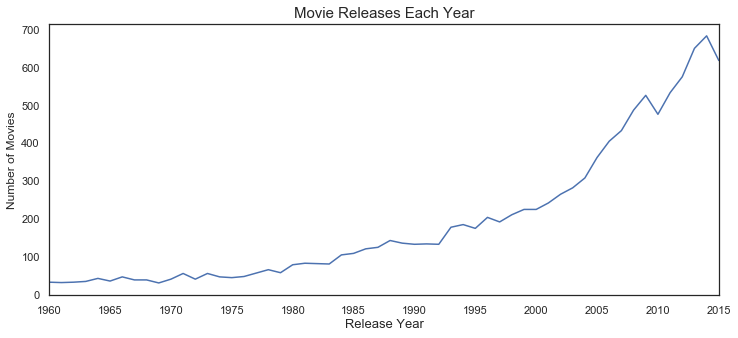

In [35]:
# Grouping the data by release year and counting the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5)) # Plot between years with 5 year ticks

# Set axis labels
plt.xlabel('Release Year',fontsize = 13)
plt.ylabel('Number of Movies')
plt.title("Movie Releases Each Year", fontsize = 15)

# Graph size
sns.set(rc={'figure.figsize':(10,5)})

# Setting the stylesheet
sns.set_style("white")

In [36]:
print(release_year_data.tail(10))

release_year
2006    404
2007    432
2008    486
2009    525
2010    475
2011    532
2012    574
2013    649
2014    682
2015    617
Name: id, dtype: int64


**Finding 1:** According the the graph, the number of movies released per year has increased over the years. The year 1960 to 1980 saw less than 100 movies per year. The 1980's saw a steady incline rising to over 200 movies per year by 2000. The year 2000 to 2009 showed a massive increase of movie releases. Unfortunately the year 2010 saw a slight dip in releases according to the '.tail()' shown above followed by another increase the following year. We can look into the budgets spent over the years now.

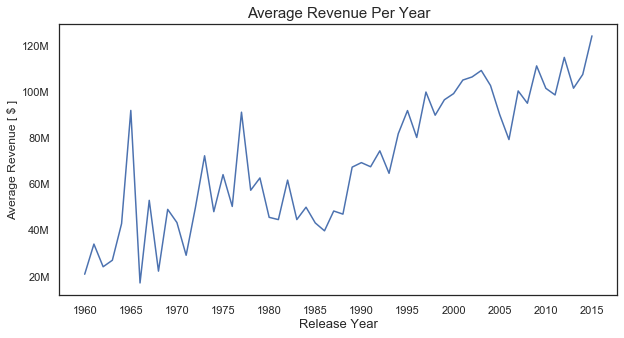

In [37]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots()

# Extracting data
ax.plot(df.groupby('release_year')['revenue'].mean())

# Set axis labels
ax.set_title("Average Revenue Per Year", fontsize = 15)
ax.set_xlabel('Release Year',fontsize = 13)
ax.set_ylabel('Average Revenue [ $ ]')

# Creating the Line Graph    
sns.set(rc={'figure.figsize':(10,5)})

# Ticks
ax.set_xticks(np.arange(1960,2016,5))          
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# Setting the stylesheet
sns.set_style("white")

plt.show()

**Finding 2:** The average revenue per year shows a steady upward trend. The mid 60's and 70's have a couple of huge spikes in revenue. The 80's shows a dip in average revenue followed by a sudden upward trend in the 90's.

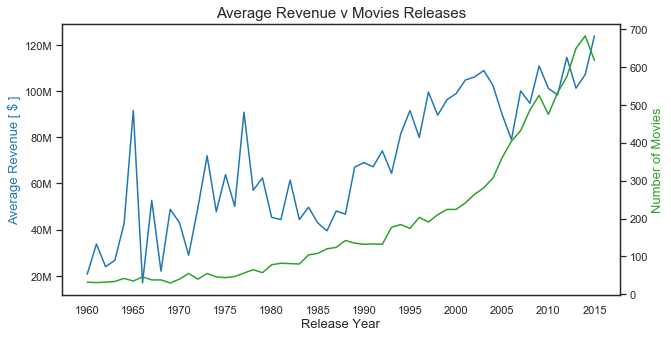

In [38]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax2 = ax.twinx() # Twin object for two different y-axis on the sample plot

# Grouping the data by release year and counting the total number of movies in each year and pot.
ax.plot(df.groupby('release_year')['revenue'].mean(),color="#1f77b4")
ax2.plot(df.groupby('release_year').count()['id'],color="#2ca02c")
         
# Set axis labels
ax.set_title("Average Revenue v Movies Releases", fontsize = 15)
ax.set_xlabel("Release Year",fontsize = 13)  
ax.set_ylabel("Average Revenue [ $ ]",color="#1f77b4",fontsize=13)         
ax2.set_ylabel("Number of Movies",color="#2ca02c",fontsize=13)

# Creating the Line Graph
sns.set(rc={'figure.figsize':(10,5)})

# Setting the stylesheet
ax.set_xticks(np.arange(1960,2016,5))
sns.set_style("white")

# Ticks
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

plt.show()

**Finding 3:** From this graph the revenue seems to increase with the amount of movies released.

In [39]:
dfrmn = df.revenue.min()
dfrmx = df.revenue.max()

print("Minimum Revenue: $","{:,}".format(round(dfrmn)))
print("Maximum Revenue: $","{:,}".format(round(dfrmx)))

Minimum Revenue: $ 2.0
Maximum Revenue: $ 2,781,505,847.0


In [40]:
# Finding the average movie budget
budget_mean = df['budget'].mean
budget_mean()

30828241.17446148

Average movie budget: $ 30,828,241
Average movie revenue: $ 89,339,813


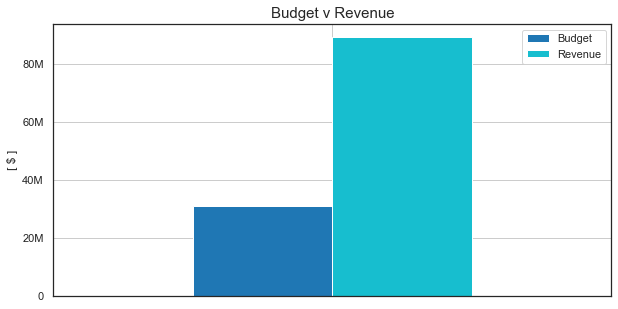

In [41]:
# Finding the mean of the budget and revenue
budget_mean = df.budget.mean()
revenue_mean = df.revenue.mean()

# Total average budget and revenue per movie
print("Average movie budget: $","{:,}".format(round(budget_mean)))
print("Average movie revenue: $","{:,}".format(round(revenue_mean)))

index = ['']
df_budget_revenue = pd.DataFrame({'Budget': budget_mean,
                                  'Revenue': revenue_mean}, index=index)
# Plotting on the axes
ax = df_budget_revenue.plot.bar(rot=0, color = ["#1f77b4", "#17becf"]) 

# Axes Label
plt.ylabel('[ $ ]')
plt.title('Budget v Revenue', fontsize=15)

# Ticks
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# Gridlines
ax.grid()

Average movie profit: $ 58,511,572


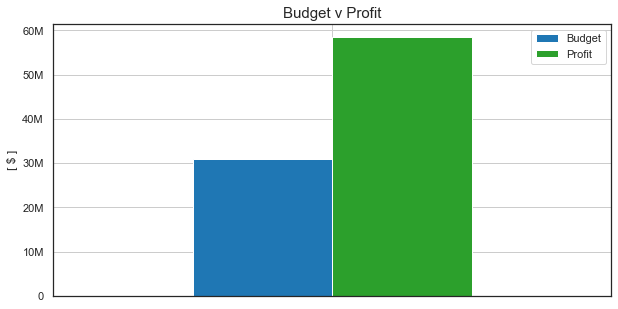

In [42]:
# Finding the mean of the budget and revenue
budget_mean = df.budget.mean()
revenue_mean = df.revenue.mean()

# Total average profit per movie
profit = revenue_mean-budget_mean
print("Average movie profit: $","{:,}".format(round(profit)))

index = ['']
df_budget_profit = pd.DataFrame({'Budget': budget_mean,
                                  'Profit': profit}, index=index)
# Plotting on the axes
ax = df_budget_profit.plot.bar(rot=0, color = ["#1f77b4", "#2ca02c"])

# Axes Label
plt.ylabel('[ $ ]')
plt.title('Budget v Profit', fontsize=15)

# Ticks
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# Gridlines
ax.grid()

**Finding 4:** It seems as budget increases, revenue increase. The same trend continues for profit.

### Q3. Time between earliest and latest movie release

In [43]:
# Fixing the issue with the date format
rmin = df.release_year.min()
rmax = df.release_year.max()
print ('Earliest movie release:', rmin)
print ('Latest movie release:', rmax)
print ('Difference in years:', rmax-rmin)

Earliest movie release: 1960
Latest movie release: 2015
Difference in years: 55


### Q4. How successful are movies released in the Summer vs Winter?

In [44]:
# Extracting the month number from the release dates
month_release = df['release_date'].dt.month

# Assigning the months
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Creating a new dataframe including the release month of each movie
month_release = pd.DataFrame(month_release)

# Renaming the column name of the new dataframe from release_date to release_month
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

# Adding a new column 'avg_revenue' in the dataframe 'month_release'
month_release['avg_revenue'] = df['revenue']

# Adding a new column 'avg_profit' by calculating revenue-budget
month_release['avg_profit'] = df.revenue-df.budget

# Grouping the data by month then calculating the mean revenue and profit of each month
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

# Looking at the dataframe we created
mean_revenue.head()

,avg_revenue,avg_profit,month
release_month,,,
1,4.294198e+07,3.051471e+07,Jan
2,6.128107e+07,4.056733e+07,Feb
3,8.484714e+07,6.559951e+07,Mar
4,7.672288e+07,5.997196e+07,Apr
5,1.363645e+08,1.187381e+08,May


In [45]:
# Renaming each month number to a real month name
revenue_by_month = mean_revenue.rename(index={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

revenue_by_month.drop(columns=['month'], axis=1, inplace=True)
print('Renamed Indexes:\n', revenue_by_month)

Renamed Indexes:
                 avg_revenue    avg_profit
release_month                            
Jan            4.294198e+07  3.051471e+07
Feb            6.128107e+07  4.056733e+07
Mar            8.484714e+07  6.559951e+07
Apr            7.672288e+07  5.997196e+07
May            1.363645e+08  1.187381e+08
Jun            1.503917e+08  1.266208e+08
Jul            1.186854e+08  9.404407e+07
Aug            5.911315e+07  4.074104e+07
Sep            4.232149e+07  2.941643e+07
Oct            6.437217e+07  4.730233e+07
Nov            1.271364e+08  1.001690e+08
Dec            1.197775e+08  9.198651e+07


In [46]:
# Checking our edits
revenue_by_month.head(12)

,avg_revenue,avg_profit
release_month,,
Jan,4.294198e+07,3.051471e+07
Feb,6.128107e+07,4.056733e+07
Mar,8.484714e+07,6.559951e+07
Apr,7.672288e+07,5.997196e+07
May,1.363645e+08,1.187381e+08
Jun,1.503917e+08,1.266208e+08
Jul,1.186854e+08,9.404407e+07
Aug,5.911315e+07,4.074104e+07
Sep,4.232149e+07,2.941643e+07


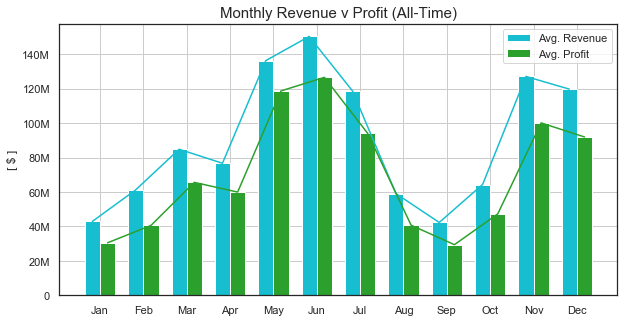

In [47]:
# Functions
fig, ax = plt.subplots()
x = np.arange(12)  # the label locations
width = 0.35  # the width of the bars

# Title
ax.set_title('Monthly Revenue v Profit (All-Time)', fontsize=15)

# Labels
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_ylabel('[ $ ]')

# Plotting the bar chart and line graphs
rects1 = ax.bar(x - width/2, revenue_by_month['avg_revenue'], width, color = "#17becf", label='Avg. Revenue')
rects2 = ax.bar(x + width/2, revenue_by_month['avg_profit'], width, color = "#2ca02c", label='Avg. Profit')

rects1 = ax.plot(x - width/2, revenue_by_month['avg_revenue'], width, color = "#17becf")
rects2 = ax.plot(x + width/2, revenue_by_month['avg_profit'], width, color = "#2ca02c")

# Ticks
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Gridlines
ax.grid(1)

# Styling
sns.set_style("whitegrid")
ax.legend()

In [48]:
# Min and max revenue and profit per month
max_monthly_revenue = revenue_by_month['avg_revenue'].max() 
min_monthly_revenue = revenue_by_month['avg_revenue'].min()
max_monthly_profit = revenue_by_month['avg_profit'].max()
min_monthly_profit = revenue_by_month['avg_profit'].min()

# Printing the results
print("Max. revenue month: $","{:,}".format(round(max_monthly_revenue)))
print("Min. revenue month: $","{:,}".format(round(min_monthly_revenue)))
print("Max. profit month: $","{:,}".format(round(max_monthly_profit)))
print("Min. profit month: $","{:,}".format(round(min_monthly_profit)))

Max. revenue month: $ 150,391,671.0
Min. revenue month: $ 42,321,492.0
Max. profit month: $ 126,620,776.0
Min. profit month: $ 29,416,426.0


In [49]:
summer_months = pd.DataFrame(revenue_by_month, columns = ['avg_revenue','avg_profit'], index = ['May','Jun','Jul'])
print(summer_months.sum())

avg_revenue    4.054416e+08
avg_profit     3.394030e+08
dtype: float64


In [50]:
winter_months = pd.DataFrame(revenue_by_month, columns = ['avg_revenue','avg_profit'], index = ['Nov','Dec','Jan'])
print(winter_months.sum())

avg_revenue    2.898559e+08
avg_profit     2.226702e+08
dtype: float64


In [51]:
print(summer_months.avg_revenue.sum())

405441580.4820029


In [52]:
print(winter_months.avg_revenue.sum())

289855909.61765623


In [53]:
summer_months.head()

,avg_revenue,avg_profit
May,1.363645e+08,1.187381e+08
Jun,1.503917e+08,1.266208e+08
Jul,1.186854e+08,9.404407e+07


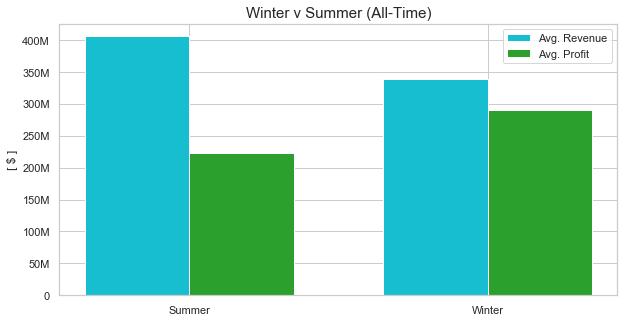

In [54]:
# Functions
fig, ax = plt.subplots()
x = np.arange(2)  # the label locations
width = 0.35  # the width of the bars

# Title
ax.set_title('Winter v Summer (All-Time)', fontsize=15)

# Summer Data Values
summer_revenue_data = summer_months.avg_revenue.sum()
summer_profit_data = summer_months.avg_profit.sum()

# Winter Data Values
winter_profit_data = winter_months.avg_profit.sum()
winter_revenue_data = winter_months.avg_revenue.sum()

# Labels
labels = ['Summer','Winter']
ax.set_ylabel('[ $ ]')

# Plotting the bar chart and line graphs
rects1 = ax.bar(x - width/2, (summer_revenue_data, summer_profit_data), width, color = "#17becf", label='Avg. Revenue')
rects2 = ax.bar(x + width/2, (winter_profit_data, winter_revenue_data), width, color = "#2ca02c", label='Avg. Profit')

# Ticks
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Gridlines
ax.grid(1)

# Styling
sns.set_style("whitegrid")
ax.legend()

**Answer:** From our findings we can see that June has the highest revenue and profit. September has the lowest revenue and profits with a late increase of revenue going into december. The 'Winter vs Summer' graph shows the summer makes more revenue than winter but the winter makes more profit than the summer. **Note:** I grouped the months of summer as 'May, June and July' and winter by 'November, December and January'. 

## Q5. How does movie budget correlate to success?

In [55]:
# Filtering the 'popularity' column from the main dataframe
popularity_df = df['popularity']

# Creating a new dataframe called 'popularity_df'
popularity_df = pd.DataFrame(popularity_df)

# Adding the 'budget' column from the main dataframe to the popularity column in the new one
popularity_df['budget'] = df['budget']

# Looking at our creation
popularity_df.head()

,popularity,budget
0,32.985763,150000000.0
1,28.419936,150000000.0
2,13.112507,110000000.0
3,11.173104,200000000.0
4,9.335014,190000000.0


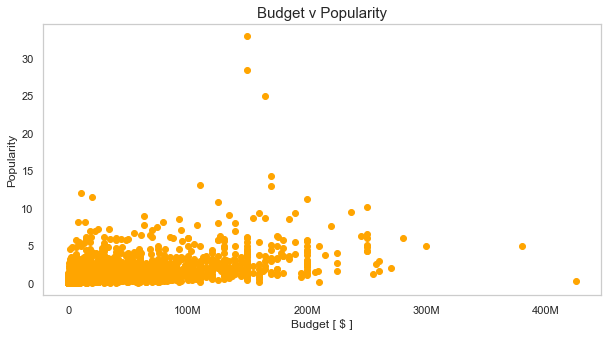

In [56]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots()

# Plot scatterplot
ax.scatter(popularity_df['budget'], popularity_df['popularity'], color='orange')  
    
# Set title and labels    
ax.set_title('Budget v Popularity', fontsize=15)
ax.set_ylabel('Popularity')
ax.set_xlabel('Budget [ $ ]') 

# Ticks
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# Gridlines
ax.grid(0)

**Answer 1:** From this data we can see that budget and popularity have very little correlation. There are a few outliers movies around the $200m budget mark with extremely high popularity. Those movies are most likely established franchises, so budget has little effect on popularity. In terms of profit, from earlier bar charts we can also see that more budget = more profit.

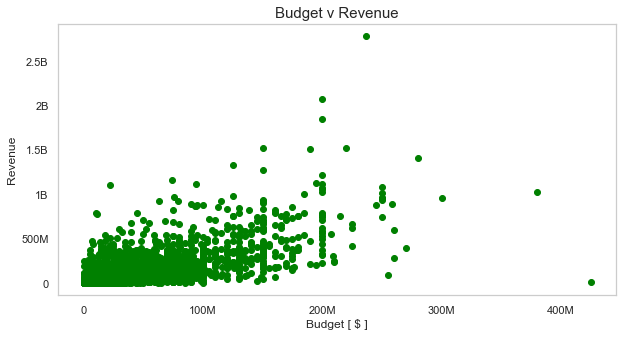

In [57]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots()

# Plot scatterplot
ax.scatter(df['budget'], df['revenue'], color='green')  
    
# Set title and labels    
ax.set_title('Budget v Revenue', fontsize=15)
ax.set_ylabel('Revenue')
ax.set_xlabel('Budget [ $ ]') 

# Ticks
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# Gridlines
ax.grid(0)

**Answer 2:** The same story goes for the Budget v Revenue scatterplot aside from a few outliers such as Avatar. Generally speaking, on average a \\$100M movie budget brings a x5 to x10 return in revenue until \\$200M which comes the point of diminishing returns.

## Q6: How does the runtime affect the ratings?

In [58]:
# Filtering the 'popularity' column from the main dataframe
runtime_ratings_df = df['runtime']

# Creating a new dataframe called 'popularity_df'
runtime_ratings_df = pd.DataFrame(runtime_ratings_df)

# Adding the 'budget' column from the main dataframe to the popularity column in the new one
runtime_ratings_df['vote_avg'] = df['vote_average']

# Looking at our creation
runtime_ratings_df.head()

,runtime,vote_avg
0,124,6.5
1,120,7.1
2,119,6.3
3,136,7.5
4,137,7.3


In [59]:
# Drop the entries with the value 0
runtime_ratings_df = runtime_ratings_df[(runtime_ratings_df != 0).all(1)]

In [60]:
# Looking at the statistical data
runtime_ratings_df.describe()

,runtime,vote_avg
count,10703.000000,10703.000000
mean,102.736896,5.966112
std,30.079331,0.930155
min,3.000000,1.500000
25%,90.000000,5.400000
50%,99.000000,6.000000
75%,112.000000,6.600000
max,900.000000,9.200000


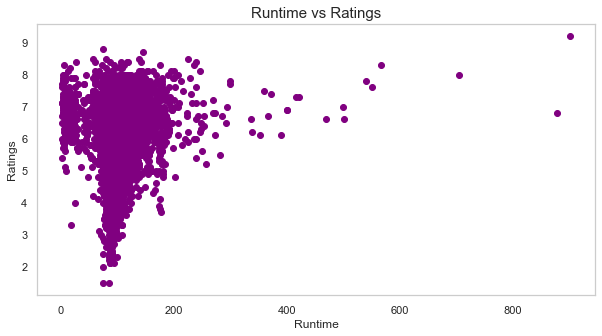

In [61]:
# Create figure and axis objects with subplots()
fig,ax = plt.subplots()
rrr = runtime_ratings_df['runtime']
rrva = runtime_ratings_df['vote_avg']

# Plot scatterplot
ax.scatter(rrr, rrva, color='purple')  
    
# Set title and labels    
ax.set_title('Runtime vs Ratings', fontsize=15)
ax.set_ylabel('Ratings')
ax.set_xlabel('Runtime') 

# Ticks
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# Gridlines
ax.grid(0)

**Answer:** The majority of films are under 200 minutes runtime with the average being 100 minutes. The takeaway is that the movies with the highest ratings are in the 100-200 minute mark, the amount of movies running longer than that drops dramatically.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Questions
**Q1.** What are the top 5 movie releases? \
**Q2.** How many movies where released each year? \
**Q3.** How far apart from the first release was the last release date? \
**Q4.** How successful are movies released in the summer vs the winter? \
**Q5.** How does movie budget correlate to success? \
**Q6:** How does the runtime affect the ratings?

### Answers

**A1:** The top 5 movie releases are high budget movies in recent years such as Avatar. \
**A2:** I can also summisze that the number of movies has increased year on year from 32 in 1960 to 617 in 2015 by 1828%. \
**A3:** The first movie in this dataset was released in 1960 and the latest was released in 2015. \
**A4:** Movies released in the summer are more successful than movies released in the winter. \
**A5:** Movie revenue tends to increase with budget and popularity. \
**A6:** The runtime tends to do well around 100-200 minutes.

## References:
Markdown cheatsheet: https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed \
Code to find null columns: https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe \
Code to find ax.set_xticks: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xticks.html \
Code to add two y-axis plots: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/ \
How to calculate percentages: https://www.kite.com/python/answers/how-to-calculate-a-percentage-in-python \
How to format a number as a percentage: https://www.kite.com/python/answers/how-to-format-a-number-as-a-percentage-in-python \
Get total of column entries: https://stackoverflow.com/questions/41286569/get-total-of-pandas-column \
Correcting the datatime parsing: https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year \
How to add commas to a number: https://www.kite.com/python/answers/how-to-add-commas-to-a-number-in-python \
Changing colour on a bar chart: https://showmecode.info/matplotlib/bar/change-bar-color/ \
Adding tick labels for charts: https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm \
Tick formatter for large numbers: https://dfrieds.com/data-visualizations/how-format-large-tick-values.html \
Add gridlines to bar chart: https://stackoverflow.com/questions/23357798/how-to-draw-grid-lines-behind-matplotlib-bar-graph \
Filtering index: https://datatofish.com/filter-pandas-dataframe/ \
Drop 0 values: https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741 \
Using dollar sign in markdown: https://stackoverflow.com/questions/16089089/escaping-dollar-sign-in-ipython-notebook \
Official filter by index: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html \
Locate by index: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/ \
.reset_index: https://stackoverflow.com/questions/37189878/pandas-add-column-to-groupby-dataframe \